# <h2> 1. Преобразуйте данные:

a. проверьте наличие пропущенных значений. Преобразуйте/удалите пропуски по необходимости;

b. закодируйте категориальные переменные числовыми значениями по необходимости. <h2>

In [41]:
import pandas as pd
import numpy as np
import pylab

In [14]:
# загружаем данные
data = pd.read_csv('athletes.csv')
data.head()

,id,name,nationality,sex,dob,height,weight,sport,gold,silver,bronze
0,736041664,A Jesus Garcia,ESP,male,10/17/69,1.72,64.0,athletics,0,0,0
1,532037425,A Lam Shin,KOR,female,9/23/86,1.68,56.0,fencing,0,0,0
2,435962603,Aaron Brown,CAN,male,5/27/92,1.98,79.0,athletics,0,0,1
3,521041435,Aaron Cook,MDA,male,1/2/91,1.83,80.0,taekwondo,0,0,0
4,33922579,Aaron Gate,NZL,male,11/26/90,1.81,71.0,cycling,0,0,0


In [15]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11538 entries, 0 to 11537
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   id           11538 non-null  int64  
 1   name         11538 non-null  object 
 2   nationality  11538 non-null  object 
 3   sex          11538 non-null  object 
 4   dob          11537 non-null  object 
 5   height       11208 non-null  float64
 6   weight       10879 non-null  float64
 7   sport        11538 non-null  object 
 8   gold         11538 non-null  int64  
 9   silver       11538 non-null  int64  
 10  bronze       11538 non-null  int64  
dtypes: float64(2), int64(4), object(5)
memory usage: 991.7+ KB


In [16]:
#Расчет количества пустых значений в признаках 
print('Для height пустых строк ' + str( len( data[ pd.isnull( data['height'] ) ] ) ))
print('Для weight пустых строк ' + str( len( data[ pd.isnull( data['weight'] ) ] ) ))
print('Для sport пустых строк ' + str( len( data[ pd.isnull( data['sport'] ) ] ) ))
print('Всего строк в наборе ' + str( len( data ) ))

Для height пустых строк 330
Для weight пустых строк 659
Для sport пустых строк 0
Всего строк в наборе 11538


In [17]:
#расчет количнества нулевых значений всего
data.isnull().sum()

id               0
name             0
nationality      0
sex              0
dob              1
height         330
weight         659
sport            0
gold             0
silver           0
bronze           0
dtype: int64

In [18]:
# просмотр уникальных значений кроме 'id'
data2=data.drop('id', axis=1)
for col in data2:
    print(col,data2[col].unique())

name ['A Jesus Garcia' 'A Lam Shin' 'Aaron Brown' ... 'di Xiao'
 'le Quoc Toan Tran' 'le Roux Hamman']
nationality ['ESP' 'KOR' 'CAN' 'MDA' 'NZL' 'AUS' 'USA' 'ETH' 'BRN' 'IOA' 'GBR' 'UZB'
 'RSA' 'EGY' 'MAR' 'QAT' 'SUD' 'ALG' 'DEN' 'NED' 'DJI' 'SEN' 'CMR' 'ITA'
 'NIG' 'SWE' 'GHA' 'AFG' 'AZE' 'KSA' 'BAN' 'NGR' 'RUS' 'IND' 'HUN' 'KAZ'
 'BDI' 'ERI' 'POL' 'BRA' 'GEO' 'CZE' 'SEY' 'GAM' 'LTU' 'IRI' 'ROU' 'CUB'
 'SLO' 'BAH' 'ARG' 'PUR' 'FRA' 'RWA' 'TOG' 'MDV' 'TUN' 'ISR' 'LAT' 'JOR'
 'MAS' 'LIB' 'LBA' 'PLE' 'IRQ' 'TUR' 'VEN' 'JPN' 'TPE' 'KGZ' 'CHN' 'MEX'
 'GRE' 'IRL' 'JAM' 'SUI' 'BAR' 'HON' 'ANG' 'GER' 'COL' 'URU' 'MNE' 'SRB'
 'BUL' 'FIN' 'UKR' 'BLR' 'SMR' 'COK' 'SAM' 'AUT' 'BEL' 'KEN' 'SVK' 'POR'
 'ECU' 'UAE' 'NAM' 'GUY' 'EST' 'SKN' 'ARU' 'PAN' 'PER' 'TAN' 'FIJ' 'GUI'
 'NOR' 'ARM' 'THA' 'SIN' 'TKM' 'CRO' 'BIH' 'TGA' 'MAW' 'DOM' 'GUA' 'MKD'
 'TJK' 'CYP' 'CHI' 'MLT' 'ZIM' 'TTO' 'CRC' 'BOL' 'BUR' 'ISL' 'HAI' 'ROT'
 'MGL' 'MAD' 'GAB' 'SRI' 'LAO' 'MRI' 'PAR' 'IVB' 'GBS' 'TLS' 'MLI' 'SYR'
 'BOT' 'C

In [19]:
# заменяем отсутствующие значения Модой
cols = list(data)
data[cols]=data[cols].fillna(data.mode().iloc[0])
data.isnull().sum()

id             0
name           0
nationality    0
sex            0
dob            0
height         0
weight         0
sport          0
gold           0
silver         0
bronze         0
dtype: int64

# <h2>2.	Разделите выборку на обучающее (80% данных) и тестовое (20% данных) подмножества. <h2>

In [20]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

In [21]:
from sklearn.preprocessing import LabelEncoder, OneHotEncoder,LabelBinarizer
le = LabelEncoder()
ohe = OneHotEncoder()
lb = LabelBinarizer()

In [22]:
# оставляем столбцы исходных данных. Перекодируем категорию sport
X = pd.get_dummies( data, columns = [ 'sport'] )
X=X.drop(columns=['id','name','sex','dob','nationality', 'gold', 'silver', 'bronze'])

X.head()

,height,weight,sport_aquatics,sport_archery,sport_athletics,sport_badminton,sport_basketball,sport_boxing,sport_canoe,sport_cycling,...,sport_rugby sevens,sport_sailing,sport_shooting,sport_table tennis,sport_taekwondo,sport_tennis,sport_triathlon,sport_volleyball,sport_weightlifting,sport_wrestling
0,1.72,64.0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1.68,56.0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1.98,79.0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1.83,80.0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
4,1.81,71.0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0


In [23]:
#Нормализуем данные
X=(X-X.min())/(X.max()-X.min())
X

,height,weight,sport_aquatics,sport_archery,sport_athletics,sport_badminton,sport_basketball,sport_boxing,sport_canoe,sport_cycling,...,sport_rugby sevens,sport_sailing,sport_shooting,sport_table tennis,sport_taekwondo,sport_tennis,sport_triathlon,sport_volleyball,sport_weightlifting,sport_wrestling
0,0.51,0.237410,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.47,0.179856,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.77,0.345324,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.62,0.352518,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
4,0.60,0.287770,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11533,0.43,0.194245,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
11534,0.52,0.230216,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
11535,0.64,0.496403,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
11536,0.39,0.179856,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


In [24]:
X.shape

(11538, 30)

In [25]:
le.fit( data['sex'] )

LabelEncoder()

In [26]:
# задаем столбец целевой переменной и нормализуем ее
y = pd.Series( data = le.transform( data['sex'] ) )
y.head()

0    1
1    0
2    1
3    1
4    1
dtype: int32

In [27]:
#Определяем зависимость пола от роста, веса и вида спорта
model = LogisticRegression()

In [28]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [29]:
model.fit(X_train, y_train)

LogisticRegression()

# <h2>3. Постройте ROC-кривую с помощью функции sklearn.metrics. roc_curve. <h2>

In [30]:
from sklearn.metrics import roc_curve

In [31]:
predictions = model.predict_proba(X_test)

In [32]:
len(X_train)

9230

In [33]:
fpr, tpr, thres = roc_curve( y_test, predictions[:, 1])

In [34]:
from matplotlib import pyplot as plt

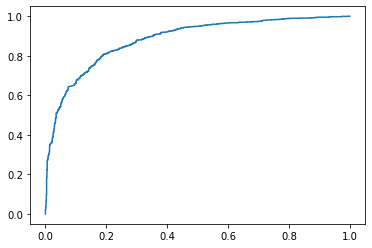

In [35]:
# строим кривую ROC на основе использования пакета sklearn
plt.plot( fpr, tpr )

# <h2>4. Вычислите значение ROC-AUC метрики с помощью функции sklearn.metrics.roc_auc_score. <h2>

In [36]:
from sklearn.metrics import roc_auc_score

In [37]:
roc_auc_score(y_test, predictions[:, 1])

0.8825325551774613

# <h2>5. Реализуйте подсчет метрик TPR, FPR «вручную», без использования готовых функций из библиотеки sklearn. <h2>

# <h2> 6. Постройте ROC-кривую с помощью вычисленных в п. 5 метрик: объедините графики из п. 3 и п. 6 в один. Сравните, сделайте вывод. <h2>

<h3>Как видим у кривой из пакета sklearn все точки находятся выше чем у нашей модели поэтому в данном случае она предпочтительней.<h3>

# <h2>7.	Постройте график Precision-Recall, используя метрики, посчитанные в п. 5.
8.	*Вычислите значение ROC-AUC метрики, используя метрики, посчитанные в п. 5. <h2>

In [38]:
# Создаем модель Logistic Regression
class LogitRegression() :
    def __init__( self, learning_rate, iterations)  :        
        self.learning_rate = learning_rate        
        self.iterations = iterations
                                   
    # Function for model training    
    def fit( self, X, Y ) :        
        # no_of_training_examples, no_of_features (столбцов)       
        self.m, self.n = X.shape        
        # weight initialization        
        self.W = np.zeros( self.n ) # 0 вектор столбцов       
        self.b = 0        
        self.X = X        
        self.Y = Y
                  
        # gradient descent learning
                  
        for i in range( self.iterations ) :
            
            self.update_weights() # запускаем обновление весов
                           
 
    # Helper function to update weights in gradient descent
 
    def update_weights( self ) : 
        A = 1 / ( 1 + np.exp( - ( self.X.dot( self.W ) + self.b ) ) )
            # calculate gradients        
        tmp0 = ( A - self.Y.T )
        tmp = np.reshape( tmp0, self.m )        
        dW = np.dot( self.X.T, tmp ) / self.m         
        db = np.sum( tmp ) / self.m 
            # обновляем веса    

        self.W = self.W - self.learning_rate * dW    
        self.b = self.b - self.learning_rate * db
       
    def predict( self, X ) :    
        Z = 1 / ( 1 + np.exp( - ( X.dot( self.W ) + self.b ) ) )        
        Y = np.where( Z > 0.5, 1, 0 )
                
        return Y
     
    def loss( self, X) :    
        Z = 1 / ( 1 + np.exp( - ( X.dot( self.W ) + self.b ) ) )        
        Y = np.where( Z > 0.5, 1, 0 )
        Loss=np.mean(-Y*np.log(Z)-(1-Y)*np.log(1-Z))
         
        return Loss 

Создаем confusion matrix  :  
Predicted    0     1
Actual              
0          968   311
1          260  1346

цикл обучения: 2885
FP: 311
TN: 968
TP: 1346
FN: 260

False Positive Rate (FPR)      :   24.315871774824082
True_Positive Rate (TPR) и Recall     :   83.8107098381071
Presicion      :   81.23114061557031
Общая точность модели   :   0.8020797227036395



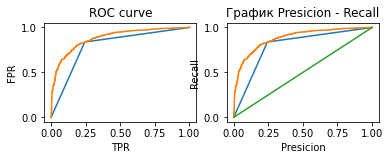

In [43]:
# Запускаем расчет модели
def main() :
    #X = X.values # all the columns except the last 1 column
    Y = y.values
    # Splitting dataset into train and test set
    X_train, X_test, Y_train, Y_test = train_test_split(
      X, Y, test_size = 1/4, random_state = 0 )
    
    # Model training    
    model = LogitRegression( learning_rate = 0.005, iterations = 100000)
    
    #запускаем функции класса  
    model.fit( X_train, Y_train )    
    L1=model.loss(X_train)
     
    # Prediction on test set
    Y_pred = model.predict( X_test ) 
  
         
    # measure performance    
    correctly_classified = 0
    FP = 0
    TN = 0
    TP = 0
    FN = 0
    FP2 = []     
    TN2 = []
    TP2 = []
    FN2 = []
        
    # counter    
    count = 0    
    for count in range( np.size( Y_pred ) ) :  
        
        if Y_test[count] == Y_pred[count] :            
            correctly_classified = correctly_classified + 1
        
        if Y_pred[count] == 1 and Y_test[count] == 0 :            
            FP = FP + 1
            FP2.append(FP)
        if Y_pred[count] == 0 and Y_test[count] == 0 :              
            TN = TN + 1
            TN2.append(TN)
        if Y_pred[count] == 1 and Y_test[count] == 1 :              
            TP = TP + 1 
            TP2.append(TP)
        if Y_pred[count] == 0 and Y_test[count] == 1 :              
            FN = FN + 1 
            FN2.append(FN)
     
        count = count + 1
    y_actual = pd.Series(Y_test, name='Actual')
    y_predicted = pd.Series(Y_pred, name='Predicted')
    
    
    print( "Создаем confusion matrix  :  ")
    print(pd.crosstab(y_actual, y_predicted))       
    #print(roc_auc_score(y_actual, y_predicted))
    print()
    
    print ("цикл обучения:", count)
    print ("FP:", FP)
    #print ("FP2:", FP2)
    print ("TN:", TN)
    print ("TP:", TP)
    print ("FN:", FN)
    print()
        
    print( "False Positive Rate (FPR)      :  ", ( 
      FP/(FP + TN) ) * 100 )
    print( "True_Positive Rate (TPR) и Recall     :  ", ( 
      TP/(TP + FN) ) * 100 )
    print( "Presicion      :  ", ( 
      TP/(TP + FP) ) * 100 )
     
    print( "Общая точность модели   :  ", ( 
       (TP + TN) / (TP + FP + FN + TN)))
    
    #print( "Потери   :  ",  (L1) ) 
          
    # Построим ROC-кривую
    fpr2 = [x/(x + y) for x, y in zip(FP2, TN2)] 
    tpr2 = [x/(x + y) for x, y in zip(TP2, FN2)]    
    
    fpr2, tpr2, thres = roc_curve( Y_test, Y_pred)
    pylab.subplot(2,2,1)
    pylab.plt.plot(fpr2, tpr2,label = 'New LR' )
    pylab.plt.plot( fpr, tpr, label = 'pyplot LR' )
    pylab.plt.title('ROC curve')
    pylab.plt.xlabel('TPR')
    pylab.plt.ylabel('FPR') 
    print()
    # Построим график Presicion - Recall
    fpr3 = [x/(x + y) for x, y in zip(TP2, FP2)] 
    tpr3 = [x/(x + y) for x, y in zip(TP2, FN2)]   
        
   
    fpr3, tpr3, thres = roc_curve( Y_test, Y_pred)
    pylab.subplot(2,2,2)
    pylab.plt.plot(fpr3, tpr3, label = 'New LR' )
    pylab.plt.plot( fpr, tpr, label = 'pyplot LR' )
    pylab.plt.plot([0,1])
    pylab.plt.title('График Presicion - Recall')
    pylab.plt.xlabel('Presicion')
    pylab.plt.ylabel('Recall')
    pylab.show()
    #roc_auc_score(Y_test, Y_pred)   
 
        
if __name__ == "__main__" :     
    main()

# <h2>9.	Сформулируйте выводы по проделанной работе:
a. как по полученным графикам сделать вывод о качестве модели? Как вы оцениваете обученную модель исходя из подсчитанных метрик?<h2>
<h3>В целом можно ориентироваться на задание по оси х. Идеальный результат это точка в левом верхнем углу. 
Как видим у кривой из пакета sklearn все точки находятся выше чем у нашей модели поэтому в данном случае она предпочтительней.
В качестве порога модели можно использовать значение около 0,2 при котором Recall составит больше 80%. 
Дальнейшее увеличение порога ведет к значительному росту ошибки (Presicion).<h3>
<h2>b. *может ли ROC-кривая проходить ниже диагонали? <h2>
<h3>В лучшем случае график ROC-кривой проходит через верхний левый угол, где доля истинно положительных случаев составляет 100% (Recall), 
а доля ложно положительных ответов (FPR) равна нулю. То есть чем ближе кривая к верхнему левому углу, тем выше предсказательная способность модели. 
И, наоборот, чем ближе она расположена к диагональной прямой, тем менее эффективна модель. Диагональная линия соответствует «бесполезному» классификатору,
т.е. отражает неразличимость двух классов.
Кривая может проходить ниже диагонали, но это будет означать, что модель начинает больше ошибаться чем угадывать.
При этом худшей точкой будет правый нижний угол, который показывает, что все предсказания были ошибочными.<h3>
